# Tanque de 1000L 38x192 (Aplicando Implicita)

 $$
\large f(x)=e^{(A-\frac{1}{x\tau})}+\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}
 $$   

   

100000


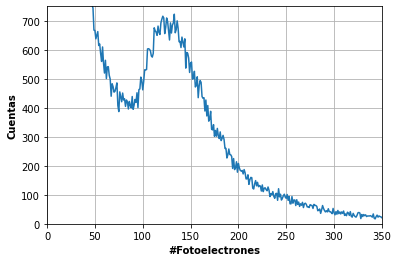

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np


dataall38x192 = np.loadtxt('histCeren38x192ElecAll.dat')

plot(dataall38x192)
ylim(0, 750)
xlim(0,350)
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.grid()
print(len(dataall38x192))

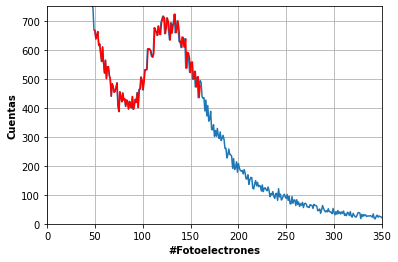

In [2]:
d = np.linspace(0, 500, 501)
d2 = np.linspace(50, 160, 110)
#d2 = np.linspace(95, 160, 65)
#d3 = np.linspace(50, 95, 45)

plt.plot(d, dataall38x192[0:501]) 
plt.plot(d2, dataall38x192[50:160],"r-")
#plt.plot(d2, dataall38x192[95:160],"r-")
#plt.plot(d3, dataall38x192[50:95],"g-")
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.xlim(0,350)
plt.ylim(0,750)

plt.grid()
plt.show()

 $$
\LARGE f(x)=e^{(A-\frac{1}{x\tau})}+\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}
 $$ 
 
 donde  $ expo= e^{(A-\frac{1}{x\tau})}$ y $ lognormal=\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}$

In [3]:
""" x = 1./x0[0];
lognormal = exp(par[0])*x*exp( -0.5*pow( ((log(x)+log(par[1]))*par[2]),2 ) );
expo = exp( par[3] - par[4]*x );
return lognormal+expo; 

def funcion(x,x0, par0, par1, par2, par3, par4):
    k = 1./x
    lognormal = exp(par0)*k*exp( -0.5*pow( ((log(x)+log(par1))*par2),2))
    expo = exp( par3 - par4*x )
    return lognormal+expo;"""

def funcion(x0, par):
    x = 1./x0
    lognormal = exp(par[0])*x*exp(-0.5*pow( ((log(x)+log(par[1]))*par[2]),2))
    expo = exp(par[3] - par[4]*x )
    return lognormal+expo;


d3 = np.linspace(0, 109, 110)

popt, pcov = curve_fit(funcion, d3, dataall38x192[50:160], p0=[1.])

print(*popt)

c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


IndexError: invalid index to scalar variable.

NameError: name 'popt' is not defined

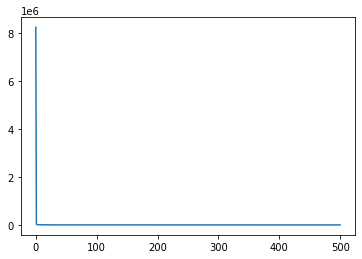

In [4]:
plt.plot(d, dataall38x192[0:501]) 
plt.plot(d2, funcion(d3, *popt), "r-")
#plt.yscale('log')
plt.xlim(0,350)
plt.ylim(0,750)
#xlim(0,150)
#ylim(0,1000)
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.grid()
#plt.savefig("Tanque1000LBajo38x192Ajuste[VEM].jpg", dpi=300, bbox_inches='tight')
plt.show()